## Feature Selection
    Use chi-squared tests to determine best features for classification of malware samples.

In [1]:
import warnings
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from time import time
from scipy.stats import randint as sp_randint
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 3. Graphs

In [17]:
train_data = pd.read_csv('data/sorted-entropy-features-apt.csv')
train_labels = pd.read_csv('data/sorted-train-labels-apt.csv')
X = train_data.iloc[:,1:]
y = train_labels.iloc[:,4]

In [4]:
train_labels.head()

,file_name,malware_type_x,sample_label,family_name,family_label
0,001dd76872d80801692ff942308c64e6,Trojan:Win32/Sluegot.D,5992,Win32.Trojan.Sluegot,2057
1,002325a0a67fded0381b5648d7fe9b8e,Trojan:Win32/Sluegot.C,5993,Win32.Trojan.Sluegot,2057
2,00dbb9e1c09dbdafb360f3163ba5a3de,Backdoor:Win32/Stradatu,6005,Win32.Backdoor.Stradatu,2064
3,0149b7bd7218aab4e257d28469fddb0d,Trojan:Win32/Sluegot.A,6017,Win32.Trojan.Sluegot,2057
4,01e0dc079d4e33d8edd050c4900818da,Backdoor:Win32/Stradatu,6005,Win32.Backdoor.Stradatu,2064


In [18]:
y.head()

0    2057
1    2057
2    2064
3    2057
4    2064
Name: family_label, dtype: int64

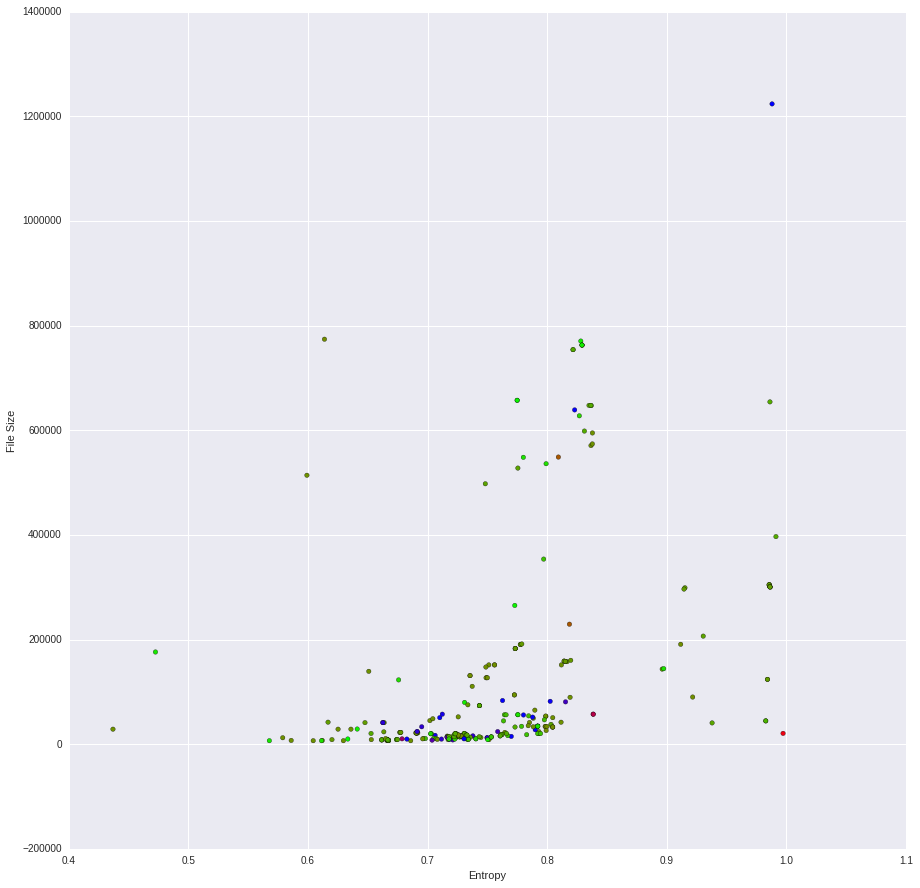

In [19]:
plt.figure(figsize=(15,15))
plt.xlabel("Entropy")
plt.ylabel("File Size")
xa = np.array(X['entropy'])
xb = np.array(X['file_size'])
ya = np.array(y)
color = [ item/255 for item in ya]
plt.scatter(xa,xb,c=ya,cmap='brg')

In [20]:
train_data = pd.read_csv('data/sorted-entropy-features-vs251.csv')
train_labels = pd.read_csv('data/sorted-train-labels-vs251.csv')
X = train_data.iloc[:,1:]
y = train_labels.iloc[:,4]
y.head()

0     4
1     0
2     6
3     9
4    10
Name: family_label, dtype: int64

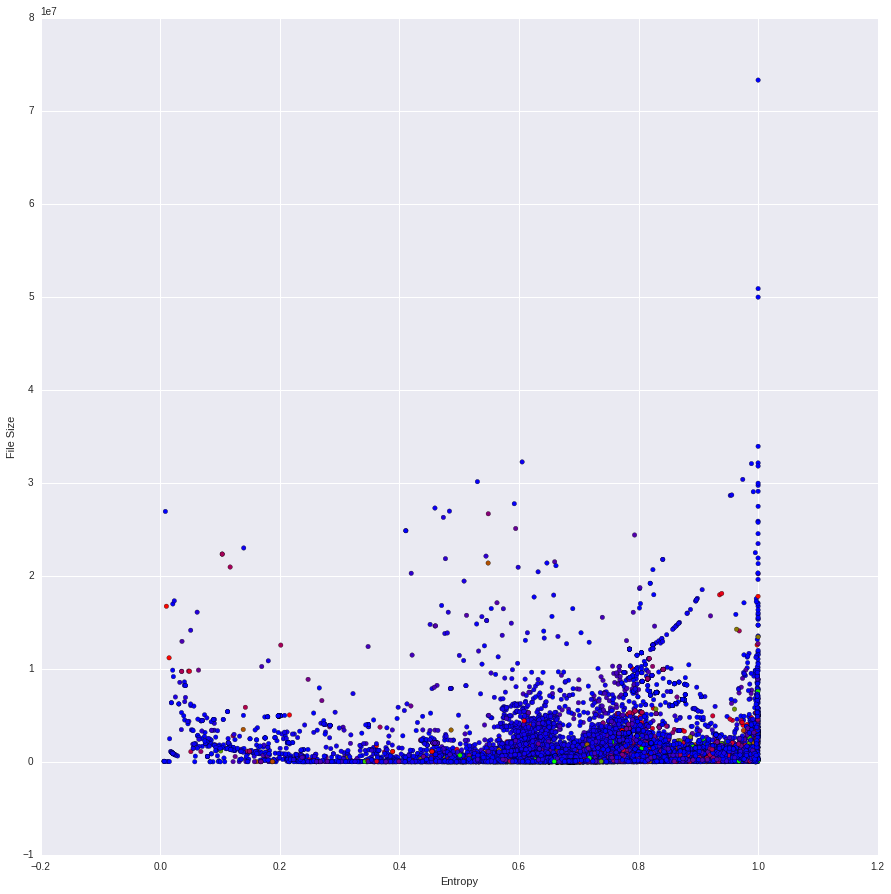

In [21]:
plt.figure(figsize=(15,15))
plt.xlabel("Entropy")
plt.ylabel("File Size")
xa = np.array(X['entropy'])
xb = np.array(X['file_size'])
ya = np.array(y)
plt.scatter(xa,xb,c=ya,cmap='brg')

In [22]:
train_data = pd.read_csv('data/sorted-entropy-features-vs252.csv')
train_labels = pd.read_csv('data/sorted-train-labels-vs252.csv')
X = train_data.iloc[:,1:]
y = train_labels.iloc[:,4]
y.head()

0    1
1    2
2    3
3    5
4    7
Name: family_label, dtype: int64

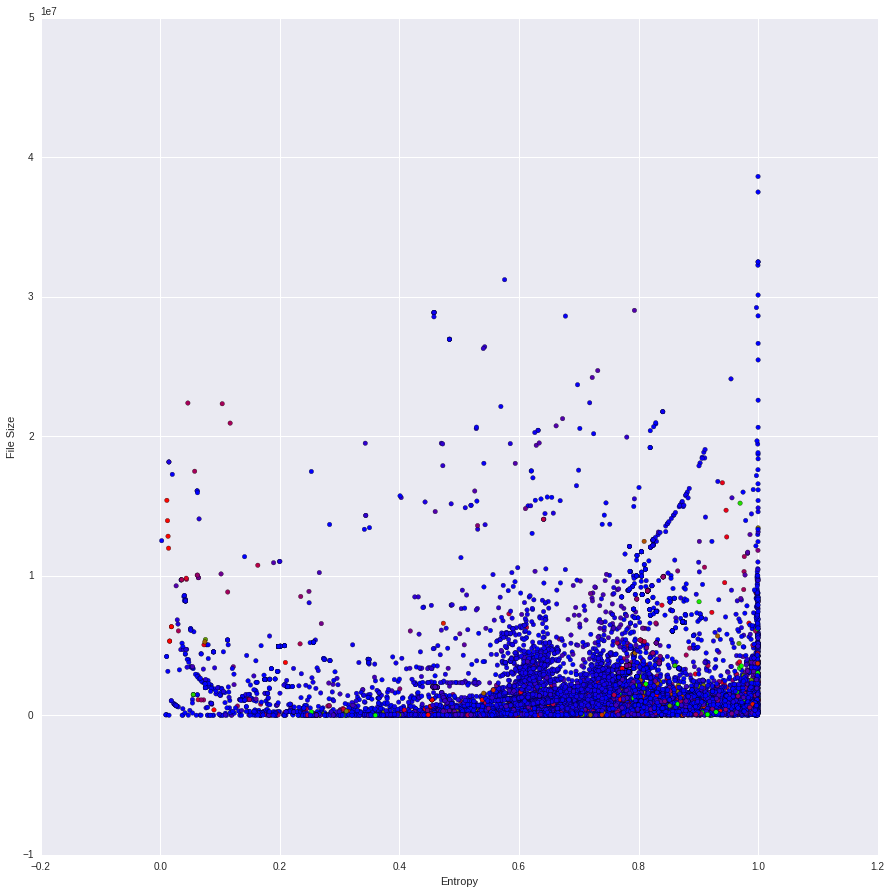

In [23]:
plt.figure(figsize=(15,15))
plt.xlabel("Entropy")
plt.ylabel("File Size")
xa = np.array(X['entropy'])
xb = np.array(X['file_size'])
ya = np.array(y)
plt.scatter(xa,xb,c=ya,cmap='brg')

In [24]:
train_data = pd.read_csv('data/sorted-entropy-features-vs263.csv')
train_labels = pd.read_csv('data/sorted-train-labels-vs263.csv')
X = train_data.iloc[:,1:]
y = train_labels.iloc[:,4]
y.head()

0    23
1    29
2    93
3    29
4     0
Name: family_label, dtype: int64

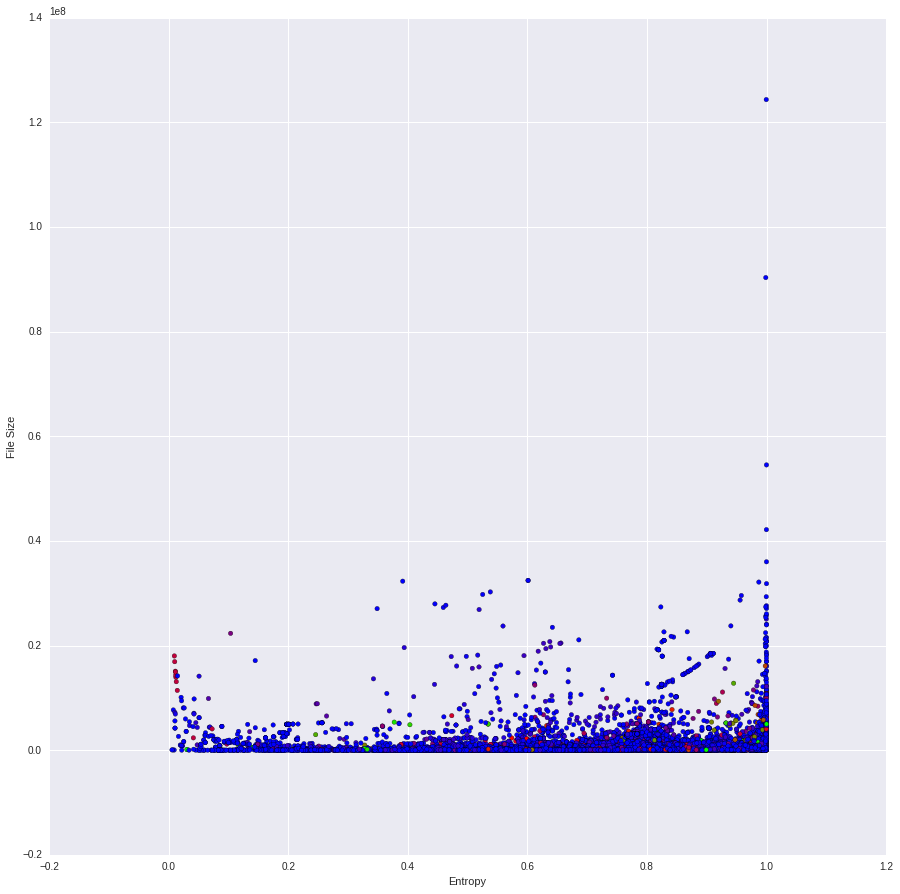

In [25]:
plt.figure(figsize=(15,15))
plt.xlabel("Entropy")
plt.ylabel("File Size")
xa = np.array(X['entropy'])
xb = np.array(X['file_size'])
ya = np.array(y)
plt.scatter(xa,xb,c=ya,cmap='brg')

In [26]:
train_data = pd.read_csv('data/sorted-entropy-features-vs264.csv')
train_labels = pd.read_csv('data/sorted-train-labels-vs264.csv')
X = train_data.iloc[:,1:]
y = train_labels.iloc[:,4]
y.head()

0       4
1    2055
2      28
3       4
4      28
Name: family_label, dtype: int64

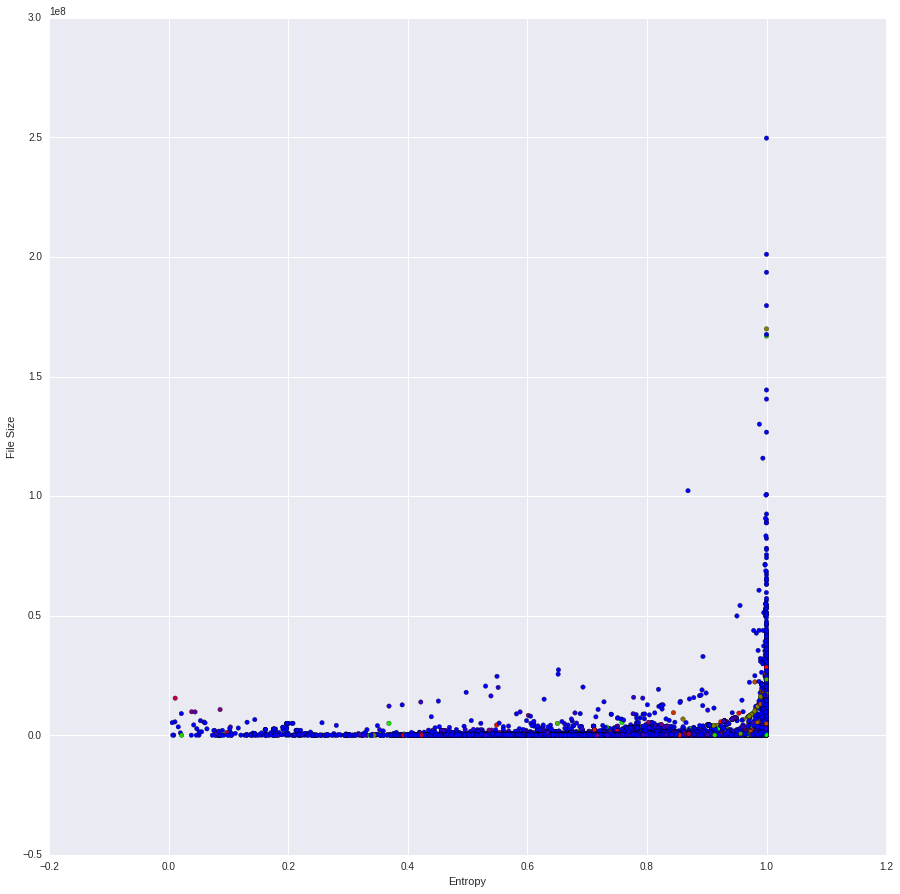

In [27]:
plt.figure(figsize=(15,15))
plt.xlabel("Entropy")
plt.ylabel("File Size")
xa = np.array(X['entropy'])
xb = np.array(X['file_size'])
ya = np.array(y)
plt.scatter(xa,xb,c=ya,cmap='brg')

In [29]:
vcounts = y.value_counts()

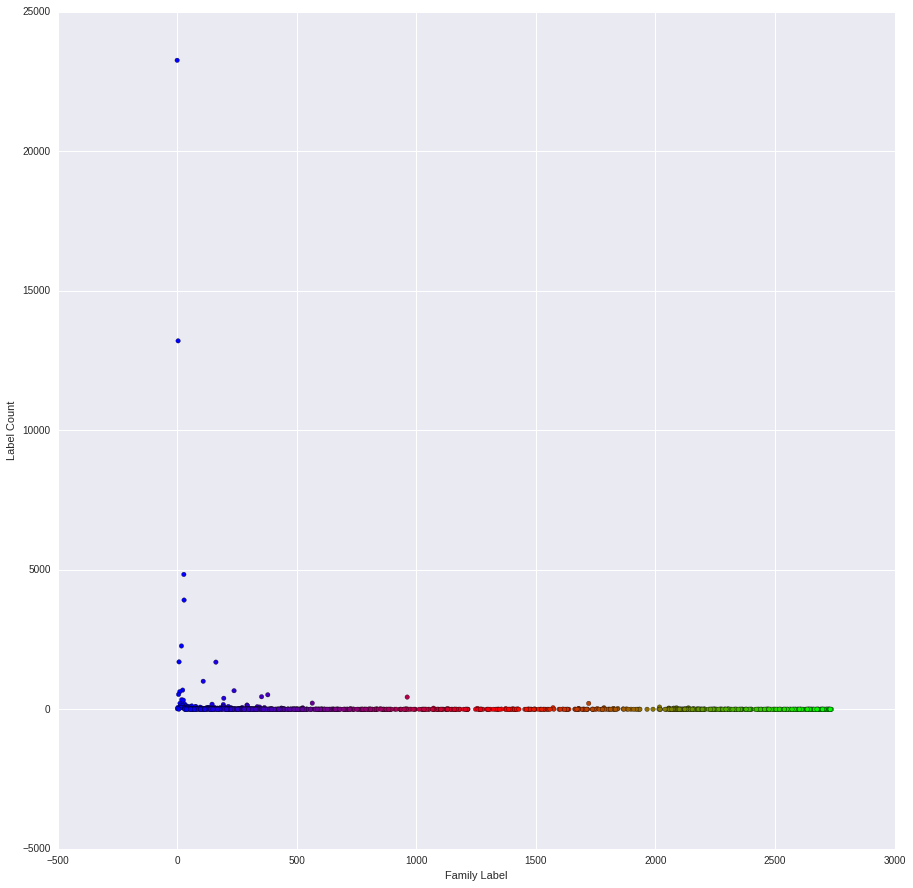

In [33]:
plt.figure(figsize=(15,15))
plt.xlabel("Family Label")
plt.ylabel("Label Count")
plt.scatter(vcounts.index, vcounts,c=vcounts.index,cmap='brg')

In [1]:
import urllib2
from BeautifulSoup import BeautifulSoup

page = urllib2.urlopen('http://www.google.com/')
soup = BeautifulSoup(page)

In [13]:
page = urllib2.urlopen('http://www.prehnite.com.au/')
soup = BeautifulSoup(page)
x = soup.body.findAll('img')

In [17]:
x = soup.body.findAll('img')

In [20]:
for line in page:
    if "<img" in line:
        print("img tag -> {:s}".format(line))

In [24]:
htmllines = page.read()

In [43]:
import urllib2
import re
response = urllib2.urlopen('http://adskeeper.co.uk/ad10300.html?site_id=1187204')
#print "Response:", response

# Get the URL. This gets the real URL. 
#print "The URL is: ", response.geturl()

# Getting the code
#print "This gets the code: ", response.code

# Get the Headers. 
# This returns a dictionary-like object that describes the page fetched, 
# particularly the headers sent by the server
#print "The Headers are: ", response.info()

# Get the date part of the header
#print "The Date is: ", response.info()['date']

# Get the server part of the header
#print "The Server is: ", response.info()['server']

# Get all data
html = response.read()
#print "Get all data: ", html
lines = html.split('\n')
# Get only the length
#print "Get the length :", len(html)

purl = re.compile('.+src="(.+\.jpg)".*')
pjpg = re.compile('.+/(\w+\.jpg)".*')
    
# Showing that the file object is iterable
for line in lines:
    if "img" in line:
        print line.rstrip()
        jpgurl = purl.match(line)
        jpgname = pjpg.match(line)
        if jpgurl != None:
            image_url = jpgurl.group(1)
            print image_url
            
        if jpgname != None:
            image_name = jpgname.group(1)
            print image_name
            jpgresponse = urllib2.urlopen(image_url)
            jpgdata = jpgresponse.read()
            of = open('data/'+image_name, 'wb')
            of.write(jpgdata)
            of.close()

        .logo img{
        .logo img:focus{


In [42]:
purl = re.compile('.+src="(.+\.jpg)".*')
pjpg = re.compile('.+/(\w+\.jpg)".*')
    
# Showing that the file object is iterable
for line in lines:
    if "img" in line:
        print line.rstrip()
        jpgurl = purl.match(line)
        jpgname = pjpg.match(line)
        if jpgurl != None:
            image_url = jpgurl.group(1)
            print image_url
            
        if jpgname != None:
            image_name = jpgname.group(1)
            print image_name
            jpgresponse = urllib2.urlopen("http://www.prehnite.com.au/"+image_url)
            jpgdata = jpgresponse.read()
            of = open('data/'+image_name, 'wb')
            of.write(jpgdata)
            of.close()

                                <p><br /><br /><img class=specimendisplay src="images/pf00064.JPG"><br /><br /></p>
images/pf00064.JPG
pf00064.JPG


In [ ]:
print html

In [ ]:
help(soup)